In [ ]:
#1 importar liberias

In [1]:

import os
import pandas as pd
import math as mt
import numpy as np


In [2]:
#LIBRERIAS PARA ANALISIS DE EEG

    #PARA GRAFICAS INTERACTIVAS
%matplotlib qt


    #PARA PROCESAMIENTOS DATOS EEG
import mne

In [3]:
#2 Lectura de los archivos en formato .BDF 
    #se excluyen las informacion de los canales de aceleracion en los X, Y, Z

In [39]:
prueba = mne.io.read_raw_bdf(r"C:\Users\jarv_\Documents\OpenBCI_GUI\Recordings\OpenBCI-BDF-2022-12-13_12-46-06.bdf", eog=None, misc=None, units = 'uV' ,infer_types=True,exclude=['Accel X','Accel Y','Accel Z'], preload = True)


Extracting EDF parameters from C:\Users\jarv_\Documents\OpenBCI_GUI\Recordings\OpenBCI-BDF-2022-12-13_12-46-06.bdf...
BDF file detected
Channel 'EEG 1' recognized as type EEG (renamed to '1').
Channel 'EEG 2' recognized as type EEG (renamed to '2').
Channel 'EEG 3' recognized as type EEG (renamed to '3').
Channel 'EEG 4' recognized as type EEG (renamed to '4').
Channel 'EEG 5' recognized as type EEG (renamed to '5').
Channel 'EEG 6' recognized as type EEG (renamed to '6').
Channel 'EEG 7' recognized as type EEG (renamed to '7').
Channel 'EEG 8' recognized as type EEG (renamed to '8').
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 130499  =      0.000 ...   521.996 secs...


In [40]:
prueba = prueba.pick_channels(['7','8']) #prueba.pick_channels(['1','2','7','8'])

ch_names = {'7':'O1','8':'O2'} #{'1':'FP1','2':'FP2','7':'O1','8':'O2'}

prueba.rename_channels(ch_names, allow_duplicates=False, verbose=None)

montage =  mne.channels.make_standard_montage('standard_1020')
prueba.set_montage(montage, match_case = False)

<RawEDF | OpenBCI-BDF-2022-12-13_12-46-06.bdf, 2 x 130500 (522.0 s), ~2.0 MB, data loaded>

In [44]:
#prueba.set_eeg_reference( ref_channels='average') no es necesario esta parte de codigo

In [41]:
prueba.info['line_freq'] = 60.

In [42]:
prueba.notch_filter([60],  method='iir', verbose=None)

Setting up band-stop filter from 59 - 61 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 59.35, 60.65 Hz: -6.02, -6.02 dB



<RawEDF | OpenBCI-BDF-2022-12-13_12-46-06.bdf, 2 x 130500 (522.0 s), ~2.0 MB, data loaded>

In [43]:
prueba.notch_filter([50],  method='iir', verbose=None)

Setting up band-stop filter from 49 - 51 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 49.38, 50.62 Hz: -6.02, -6.02 dB



<RawEDF | OpenBCI-BDF-2022-12-13_12-46-06.bdf, 2 x 130500 (522.0 s), ~2.0 MB, data loaded>

In [48]:
df = prueba.to_data_frame()
df

,time,O1,O2
0,0.000,-0.035941,-0.040933
1,0.004,-0.017976,-0.021317
2,0.008,-0.002136,-0.004742
3,0.012,0.011355,0.008634
4,0.016,0.022556,0.019040
...,...,...,...
85449,341.796,-0.185718,-0.126788
85450,341.800,-0.147123,-0.098096
85451,341.804,-0.101991,-0.066866
85452,341.808,-0.052202,-0.033876


In [38]:
prueba = prueba.filter(l_freq=1, h_freq=None ,picks='eeg', n_jobs=4 , method='iir')

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

IIR filter parameters
---------------------
Butterworth highpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoff at 1.00 Hz: -6.02 dB



C:\Users\jarv_\AppData\Local\Temp\ipykernel_31432\3676314195.py:1: RuntimeWarning: joblib not installed. Cannot run in parallel.
  prueba = prueba.filter(l_freq=1, h_freq=None ,picks='eeg', n_jobs=4 , method='iir')


In [45]:
#filtro pasa banda entre 4 Hz - 20 Hz para quitar el DC offset y restringir la banda de frecuencias

prueba = prueba.filter(l_freq=5, h_freq=20 ,picks='eeg', n_jobs=4 , method='iir')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 15 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 5.00, 15.00 Hz: -6.02, -6.02 dB



C:\Users\jarv_\AppData\Local\Temp\ipykernel_33380\2264461250.py:3: RuntimeWarning: joblib not installed. Cannot run in parallel.
  prueba = prueba.filter(l_freq=5, h_freq=15 ,picks='eeg', n_jobs=4 , method='iir')


Using matplotlib as 2D backend.


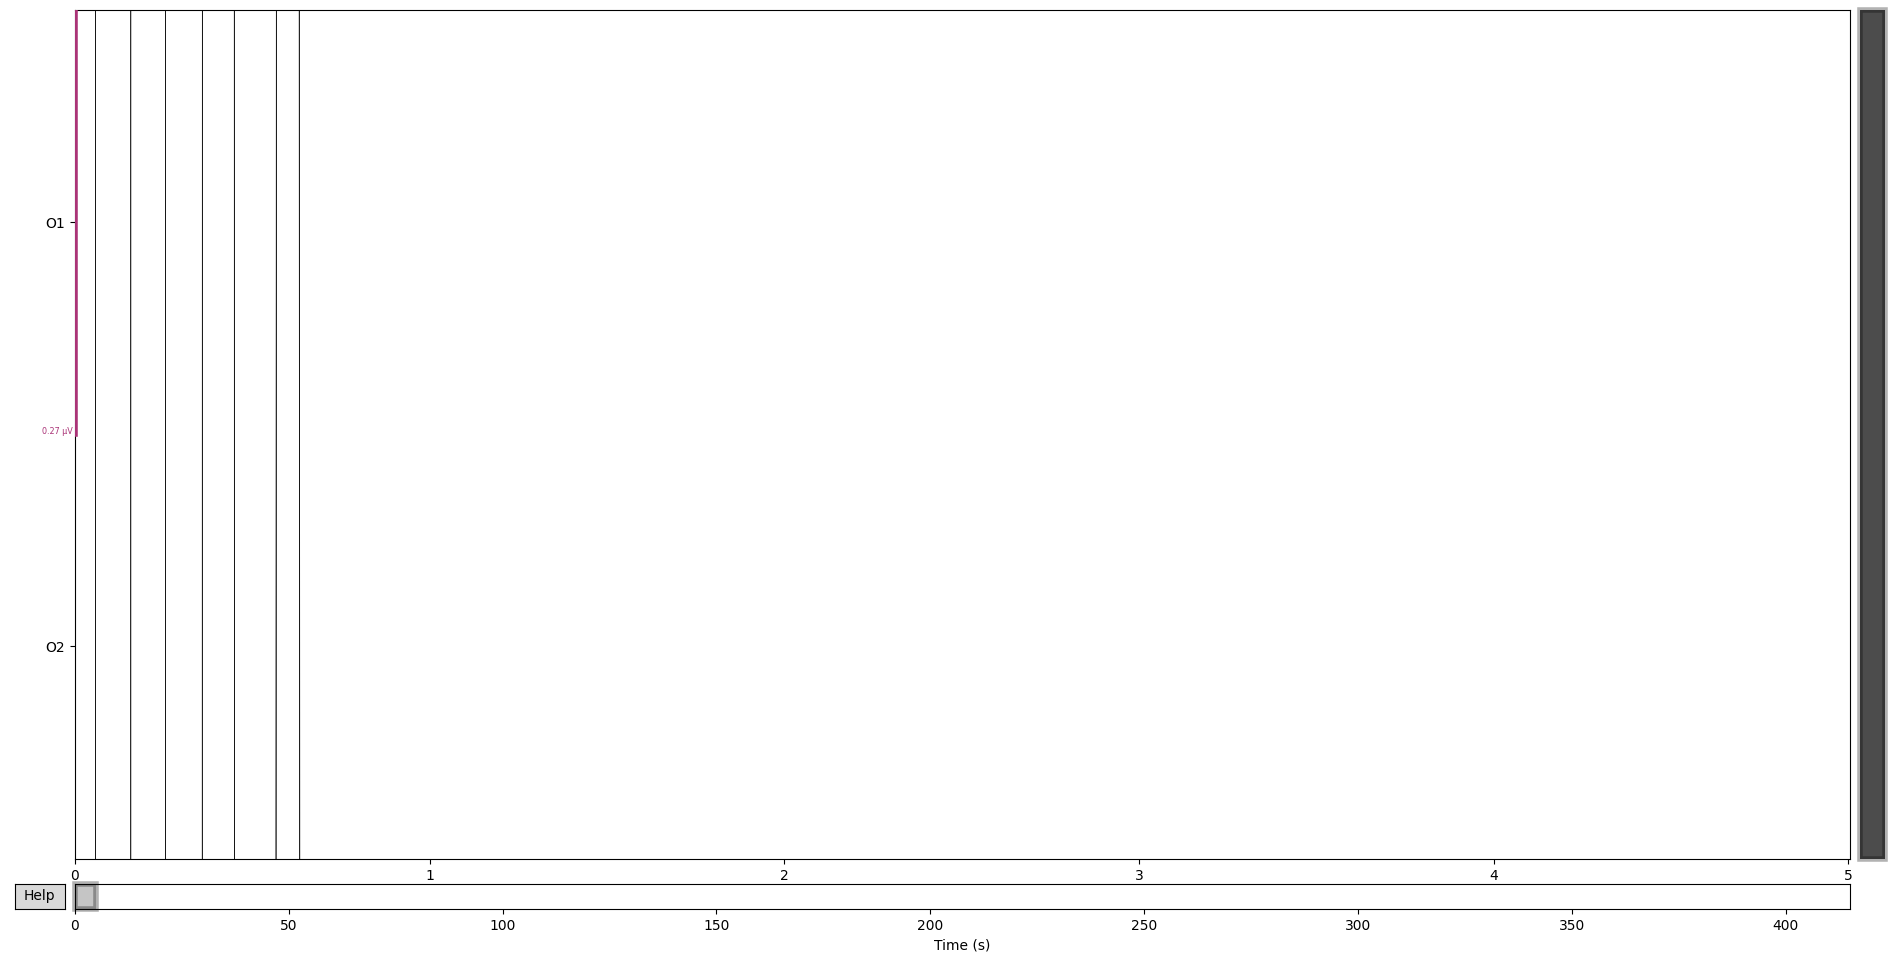

Channels marked as bad:
none


In [9]:
prueba.plot( duration = 5.0, show_first_samp = True, scalings = 'auto', title = 'EEG SUJETO 1 EXP. BLANCO (SIN PROCESAR)', clipping = None)

In [47]:
#recorte de las seccion donde se realiza el experimento hasta 30 segundos antes del final
inicio = 180.183
final = 521.996

prueba = prueba.crop(tmin=inicio, tmax=final, include_tmax=True)

In [49]:
prueba

<RawEDF | OpenBCI-BDF-2022-12-13_12-46-06.bdf, 2 x 85454 (341.8 s), ~1.3 MB, data loaded>

Using matplotlib as 2D backend.


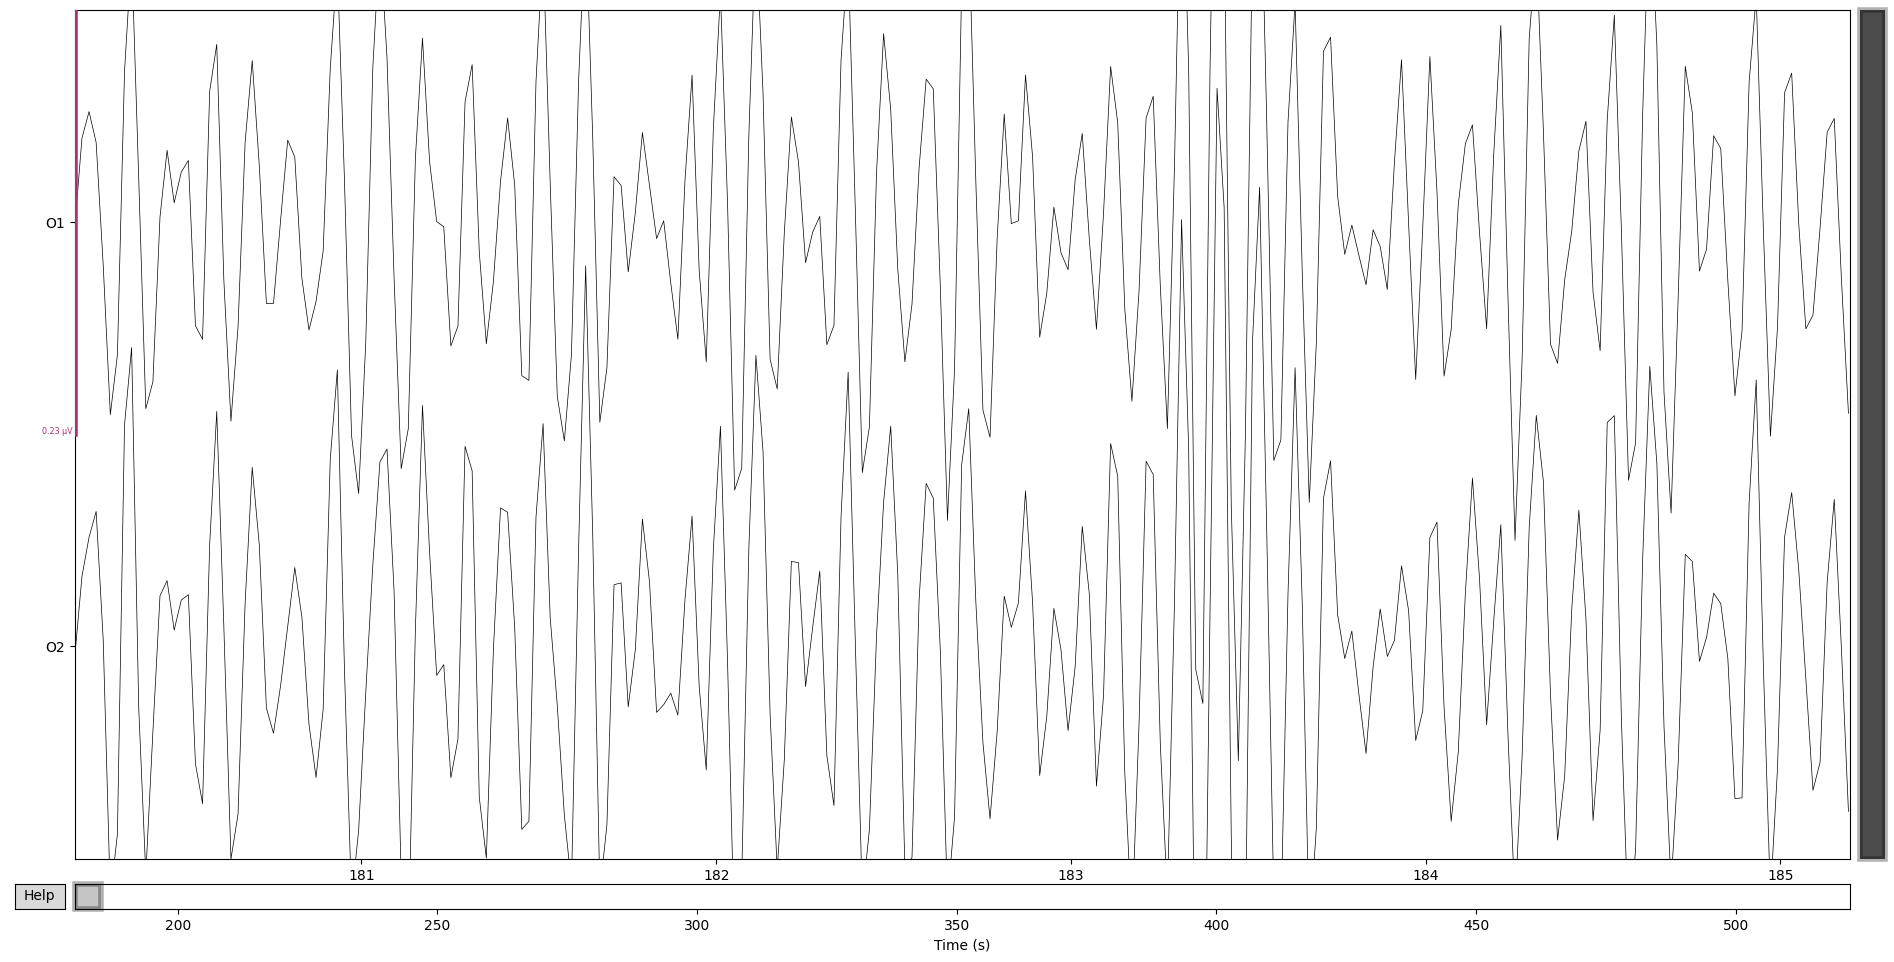

Channels marked as bad:
none


In [17]:
prueba.plot(duration=5.0,show_first_samp=True,scalings='auto',title='EEG SUJETO 1 EXP. BLANCO (SIN PROCESAR)',clipping=None)

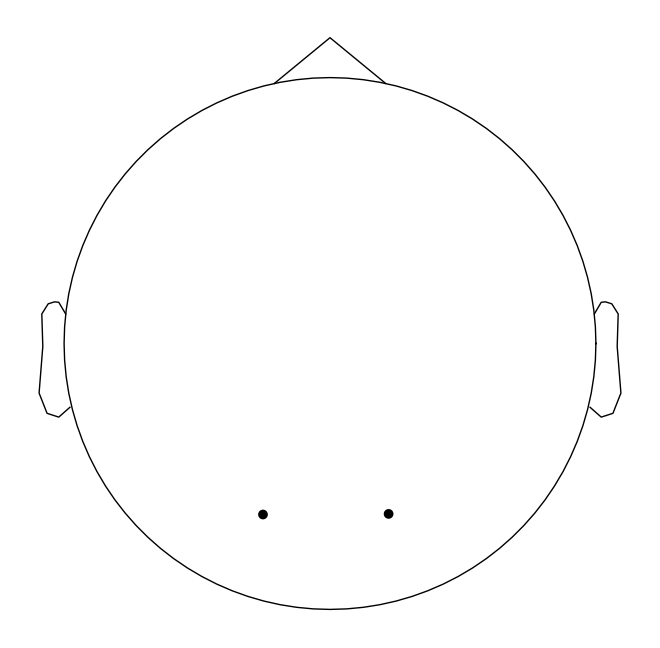

In [233]:
prueba.plot_sensors()


In [ ]:
eventos = mne.make_fixed_length_events(prueba, id=1, start=0, stop=None, duration=1.0, first_samp=True, overlap=0.0)

In [217]:
eventos_id = {'5 hz': 1, 'Abajo': 2,'Derecha':3,'Arriba':4}#'baseline':5}

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.024 (s)


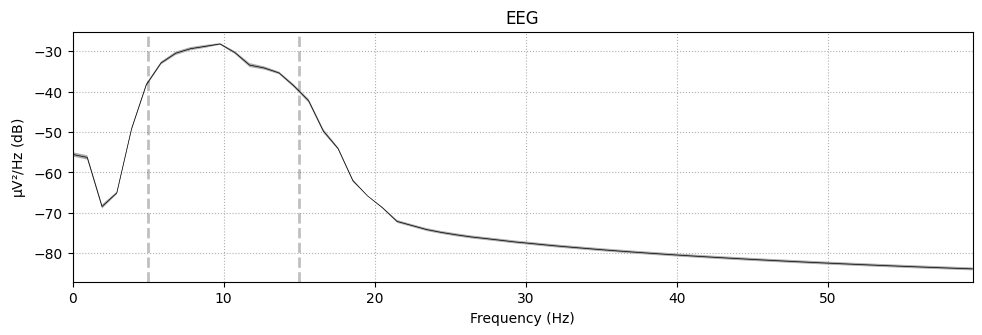

In [50]:
prueba.plot_psd(tmax=np.inf, fmax=60, average=True)

In [264]:
comienzo = 1
termino = final-inicio-3.5

tmin = comienzo
tmax = termino
fmin = 1.
fmax = 20.
sfreq = prueba.info['sfreq']

spectrum = prueba.compute_psd(
    'welch',
    n_fft=int(sfreq * (tmax - tmin)),
    n_overlap=0, n_per_seg=None,
    tmin=tmin, tmax=tmax,
    fmin=fmin, fmax=fmax,
    window='boxcar',
    verbose=False)
psds, freqs = spectrum.get_data(return_freqs=True)

In [265]:
spectrum

Data type,Power Spectrum
Units,eeg: V²/Hz
Data source,Raw
Dims,"channel, freq"
Estimation method,welch
Number of channels,2
Number of frequency bins,6409
Frequency range,1.00 – 20.00 Hz


In [266]:
psds.shape

(2, 6409)

In [267]:
freqs

array([ 1.00203965,  1.00500427,  1.00796888, ..., 19.99335926,
       19.99632388, 19.99928849])

In [268]:
def snr_spectrum(psd, noise_n_neighbor_freqs=1, noise_skip_neighbor_freqs=1):
    """Compute SNR spectrum from PSD spectrum using convolution.

    Parameters
    ----------
    psd : ndarray, shape ([n_trials, n_channels,] n_frequency_bins)
        Data object containing PSD values. Works with arrays as produced by
        MNE's PSD functions or channel/trial subsets.
    noise_n_neighbor_freqs : int
        Number of neighboring frequencies used to compute noise level.
        increment by one to add one frequency bin ON BOTH SIDES
    noise_skip_neighbor_freqs : int
        set this >=1 if you want to exclude the immediately neighboring
        frequency bins in noise level calculation

    Returns
    -------
    snr : ndarray, shape ([n_trials, n_channels,] n_frequency_bins)
        Array containing SNR for all epochs, channels, frequency bins.
        NaN for frequencies on the edges, that do not have enough neighbors on
        one side to calculate SNR.
    """
    # Construct a kernel that calculates the mean of the neighboring
    # frequencies
    averaging_kernel = np.concatenate((
        np.ones(noise_n_neighbor_freqs),
        np.zeros(2 * noise_skip_neighbor_freqs + 1),
        np.ones(noise_n_neighbor_freqs)))
    averaging_kernel /= averaging_kernel.sum()

    # Calculate the mean of the neighboring frequencies by convolving with the
    # averaging kernel.
    mean_noise = np.apply_along_axis(
        lambda psd_: np.convolve(psd_, averaging_kernel, mode='valid'),
        axis=-1, arr=psd
    )

    # The mean is not defined on the edges so we will pad it with nas. The
    # padding needs to be done for the last dimension only so we set it to
    # (0, 0) for the other ones.
    edge_width = noise_n_neighbor_freqs + noise_skip_neighbor_freqs
    pad_width = [(0, 0)] * (mean_noise.ndim - 1) + [(edge_width, edge_width)]
    mean_noise = np.pad(
        mean_noise, pad_width=pad_width, constant_values=np.nan
    )

    return psd / mean_noise

In [269]:
snrs = snr_spectrum(psds, noise_n_neighbor_freqs=3,
                    noise_skip_neighbor_freqs=1)

In [270]:
snrs

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [271]:
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

In [272]:
 #psds_plot

In [273]:
fig, axes = plt.subplots(2, 1, sharex='all', sharey='none', figsize=(8, 5))
freq_range = range(np.where(np.floor(freqs) == 4)[0][0],
                   np.where(np.ceil(freqs) == fmax - 1)[0][0])

psds_plot = 10 * np.log10(psds)
psds_mean = psds_plot.mean(axis=(0))[freq_range]
psds_std = psds_plot.std(axis=(0))[freq_range]
axes[0].plot(freqs[freq_range], psds_mean, color='b')
axes[0].fill_between(
    freqs[freq_range], psds_mean - psds_std, psds_mean + psds_std,
    color='b', alpha=.2)
axes[0].set(title="PSD spectrum", ylabel='Power Spectral Density [dB]')

# SNR spectrum
snr_mean = snrs.mean(axis=(0))[freq_range]
snr_std = snrs.std(axis=(0))[freq_range]

axes[1].plot(freqs[freq_range], snr_mean, color='r')
axes[1].fill_between(
    freqs[freq_range], snr_mean - snr_std, snr_mean + snr_std,
    color='r', alpha=.2)
axes[1].set(
    title="SNR spectrum", xlabel='Frequency [Hz]',
    ylabel='SNR', ylim=[-2, 30], xlim=[fmin, fmax])
fig.show()